In [1]:
import warnings
warnings.filterwarnings('ignore')

import dill
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import tensorflow as tf
from sklearn.model_selection import train_test_split
import sklearn

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
import shap
import lime

shap.initjs()

from examine_explanation import examine_interpretation
from examine_explanation import examine_local_fidelity
from examine_explanation import get_lipschitz

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Fico

In [2]:
df = pd.read_csv('heloc_dataset_v1.csv')

target = 'RiskPerformance'
fico_y = (df[target] == 'Bad').astype(int)
fico_X = df.drop(target, axis=1)
feature_names = fico_X.columns
feature_names = [feature + ": " + str(idx+1) for idx, feature in enumerate(feature_names)]


fico_scaler = sklearn.preprocessing.StandardScaler()
fico_scaler.fit(fico_X)
fico_X = fico_scaler.transform(fico_X)

fico_X = pd.DataFrame(fico_X)

f_X_train, f_X_test, f_y_train, f_y_test = train_test_split(fico_X, fico_y.values, test_size=0.01, random_state=42)
#X_test_smaller = X_test[:150]




In [3]:
fico_forest = xgb.XGBClassifier()
#fico_forest = RandomForestClassifier()
fico_forest.fit(f_X_train, f_y_train)

fico_preds = fico_forest.predict(f_X_test)
print(accuracy_score(f_y_test, fico_preds))

0.780952380952381


In [4]:
f_forest = RandomForestClassifier()
f_forest.fit(f_X_train, f_y_train)

fico_preds = f_forest.predict(f_X_test)
print(accuracy_score(f_y_test, fico_preds))

0.7142857142857143


In [7]:
f_X_train1, f_X_test1, f_y_train1, f_y_test1 = train_test_split(fico_X, fico_y.values, test_size=0.01, random_state=42)

f_forest1 = RandomForestClassifier()
f_forest1.fit(f_X_train1, f_y_train1)

f_X_train2, f_X_test2, f_y_train2, f_y_test2 = train_test_split(fico_X, fico_y.values, test_size=0.01, random_state=42)

f_forest2 = RandomForestClassifier()
f_forest2.fit(f_X_train2, f_y_train2)

f_X_train3, f_X_test3, f_y_train3, f_y_test3 = train_test_split(fico_X, fico_y.values, test_size=0.01, random_state=42)

f_forest3 = RandomForestClassifier()
f_forest3.fit(f_X_train3, f_y_train3)

f_X_train4, f_X_test4, f_y_train4, f_y_test4 = train_test_split(fico_X, fico_y.values, test_size=0.01, random_state=42)

f_forest4 = RandomForestClassifier()
f_forest4.fit(f_X_train4, f_y_train4)

f_X_train5, f_X_test5, f_y_train5, f_y_test5 = train_test_split(fico_X, fico_y.values, test_size=0.01, random_state=42)

f_forest5 = RandomForestClassifier()
f_forest5.fit(f_X_train5, f_y_train5)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [219]:
len(f_X_test.iloc[0])

23

[0.13523809523809527,
 0.1631746031746032,
 0.17968253968253967,
 0.18984126984126992,
 0.18031746031746032,
 0.173968253968254,
 0.19111111111111123,
 0.1980952380952382,
 0.1955555555555556,
 0.17587301587301585]

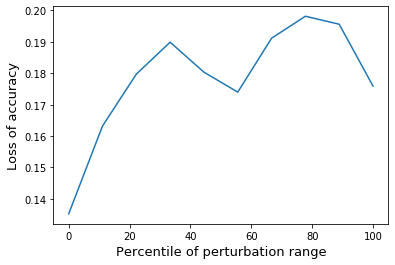

In [269]:
examine_local_fidelity(f_forest, f_X_test, f_y_test, framework='shap', count_per_step=15, epsilon=23, resolution=10)

[0.10380952380952391,
 0.12476190476190474,
 0.1590476190476191,
 0.13523809523809527,
 0.20571428571428563,
 0.20000000000000007,
 0.18380952380952387,
 0.18571428571428583,
 0.20666666666666667,
 0.16666666666666663]

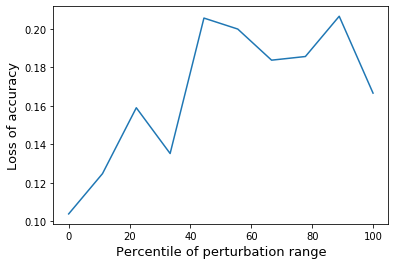

In [5]:
examine_local_fidelity(f_forest, f_X_test, f_y_test, framework='lime', count_per_step=10, epsilon=23, resolution=10)

In [242]:
xgb_explainer = shap.TreeExplainer(fico_forest)
xgb_shap_values = xgb_explainer.shap_values(f_X_test)

In [252]:
shap.initjs()
shap.force_plot(xgb_explainer.expected_value[0], xgb_shap_values[1][2], feature_names=feature_names)
#shap.force_plot(nn_norm_explainer.expected_value, nn_norm_shap_values[0][31], feature_names=feature_names)

# Titanic

In [3]:
titanic_train = pd.read_csv('titanic_train.csv')

titanic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

titanic_train['Age'].fillna(titanic_train['Age'].median(), inplace=True)
titanic_train['Embarked'].fillna('S', inplace=True)

titanic_train['Sex'] = (titanic_train['Sex'] == 'female').astype(int)
titanic_train['Fare'] = titanic_train['Fare'].astype(int)

titanic_train['Embarked'] = titanic_train['Embarked'].map({'Q': 0, 'C': 1, 'S': 2})

titanic_X = titanic_train.drop(['Survived'], axis=1)
titanic_y = titanic_train['Survived']

titanic_scaler = sklearn.preprocessing.StandardScaler()
titanic_scaler.fit()

#titanic_X = tf.keras.utils.normalize(titanic_X, axis=1)

titanic_X_train, titanic_X_test, titanic_y_train, titanic_y_test = train_test_split(titanic_X, titanic_y, test_size=0.2, random_state=42)

TypeError: fit() missing 1 required positional argument: 'X'

# Iris 
Multi class clasification

In [8]:
iris_X, iris_y = sklearn.datasets.load_iris(return_X_y=True)
iris_X = pd.DataFrame(iris_X)
i_X_train, i_X_test, i_y_train, i_y_test = train_test_split(iris_X, iris_y, test_size=0.2, random_state=42)

In [9]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(i_X_train, i_y_train)

tree_preds = tree.predict(i_X_test)
print(accuracy_score(i_y_test, tree_preds))


0.9666666666666667


In [10]:
i_forest_model = RandomForestClassifier()
i_forest_model.fit(i_X_train, i_y_train)
i_forest_preds = i_forest_model.predict(i_X_test)
print(accuracy_score(i_y_test, i_forest_preds))

1.0


[0.03666666666666685,
 0.11999999999999988,
 0.2699999999999999,
 0.3550000000000002,
 0.3633333333333335,
 0.44666666666666666,
 0.41000000000000003,
 0.45833333333333337,
 0.4933333333333334,
 0.505]

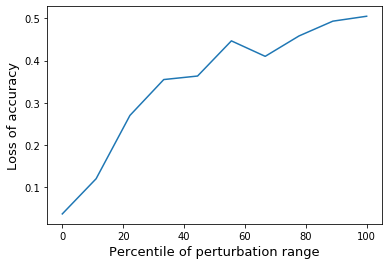

In [11]:
examine_local_fidelity(i_forest_model, i_X_test, i_y_test, framework='shap', count_per_step=20)

[0.22499999999999987,
 0.3350000000000001,
 0.4650000000000001,
 0.4950000000000001,
 0.5700000000000001,
 0.5800000000000001,
 0.585,
 0.65,
 0.635,
 0.65]

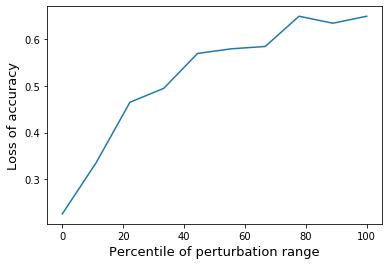

In [10]:
examine_local_fidelity(i_forest_model, i_X_test.iloc[:10], i_y_test[:10], framework='lime', count_per_step=20)

In [32]:
i_X_train1, i_X_test1, i_y_train1, i_y_test1 = train_test_split(iris_X, iris_y, test_size=0.3, random_state=42)

i_forest_model1 = RandomForestClassifier()
i_forest_model1.fit(i_X_train1, i_y_train1)

i_X_train2, i_X_test2, i_y_train2, i_y_test2 = train_test_split(iris_X, iris_y, test_size=0.3, random_state=42)

i_forest_model2 = RandomForestClassifier()
i_forest_model2.fit(i_X_train2, i_y_train2)

i_X_train3, i_X_test3, i_y_train3, i_y_test3 = train_test_split(iris_X, iris_y, test_size=0.3, random_state=42)

i_forest_model3 = RandomForestClassifier()
i_forest_model3.fit(i_X_train3, i_y_train3)

i_X_train4, i_X_test4, i_y_train4, i_y_test4 = train_test_split(iris_X, iris_y, test_size=0.3, random_state=42)

i_forest_model4 = RandomForestClassifier()
i_forest_model4.fit(i_X_train4, i_y_train4)

i_X_train5, i_X_test5, i_y_train5, i_y_test5 = train_test_split(iris_X, iris_y, test_size=0.3, random_state=42)

i_forest_model5 = RandomForestClassifier()
i_forest_model5.fit(i_X_train5, i_y_train5)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Wine
Multi class classification, 13 features

In [14]:
wine_X, wine_y = sklearn.datasets.load_wine(return_X_y=True)

wine_scaler = sklearn.preprocessing.StandardScaler()
wine_scaler.fit(wine_X)
wine_X = wine_scaler.transform(wine_X)

wine_X = pd.DataFrame(wine_X)
w_X_train, w_X_test, w_y_train, w_y_test = train_test_split(wine_X, wine_y, test_size=0.2, random_state=42)

In [15]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(w_X_train, w_y_train)

tree_preds = tree.predict(w_X_test)
print(accuracy_score(w_y_test, tree_preds))

0.8611111111111112


In [16]:
w_forest_model = RandomForestClassifier()
w_forest_model.fit(w_X_train, w_y_train)
w_forest_preds = w_forest_model.predict(w_X_test)
print(accuracy_score(w_y_test, w_forest_preds))

0.9166666666666666


In [17]:
w_X_train1, w_X_test1, w_y_train1, w_y_test1 = train_test_split(wine_X, wine_y, test_size=0.2, random_state=42)

w_forest_model1 = RandomForestClassifier()
w_forest_model1.fit(w_X_train1, w_y_train1)

w_X_train2, w_X_test2, w_y_train2, w_y_test2 = train_test_split(wine_X, wine_y, test_size=0.2, random_state=42)

w_forest_model2 = RandomForestClassifier()
w_forest_model2.fit(w_X_train2, w_y_train2)

w_X_train3, w_X_test3, w_y_train3, w_y_test3 = train_test_split(wine_X, wine_y, test_size=0.2, random_state=42)

w_forest_model3 = RandomForestClassifier()
w_forest_model3.fit(w_X_train3, w_y_train3)

w_X_train4, w_X_test4, w_y_train4, w_y_test4 = train_test_split(wine_X, wine_y, test_size=0.2, random_state=42)

w_forest_model4 = RandomForestClassifier()
w_forest_model4.fit(w_X_train4, w_y_train4)

w_X_train5, w_X_test5, w_y_train5, w_y_test5 = train_test_split(wine_X, wine_y, test_size=0.2, random_state=42)

w_forest_model5 = RandomForestClassifier()
w_forest_model5.fit(w_X_train5, w_y_train5)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

[0.10555555555555574,
 0.1611111111111111,
 0.27222222222222225,
 0.27222222222222225,
 0.3833333333333334,
 0.4277777777777777,
 0.37222222222222223,
 0.3722222222222221,
 0.47777777777777763,
 0.4]

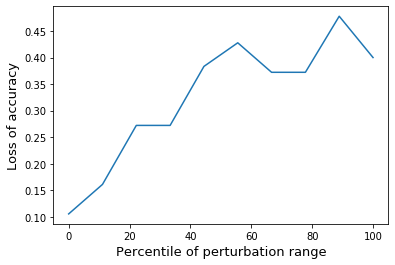

In [57]:
examine_local_fidelity(w_forest_model, w_X_test, w_y_test, framework='shap', count_per_step=5, epsilon=20)

[0.134,
 0.20799999999999996,
 0.30799999999999994,
 0.32800000000000007,
 0.3739999999999999,
 0.4039999999999999,
 0.39,
 0.4079999999999999,
 0.42399999999999993,
 0.4159999999999999]

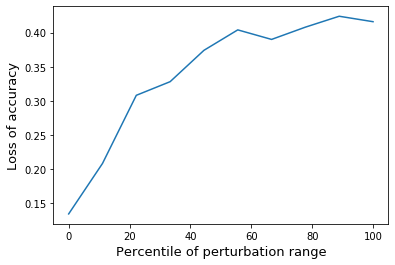

In [58]:
examine_local_fidelity(w_forest_model, w_X_test.iloc[:25], w_y_test[:25], framework='lime', count_per_step=20, epsilon=20)

# Breast cancer
Binary classification
30 features

In [18]:
b_X, b_y = sklearn.datasets.load_breast_cancer(return_X_y=True)

b_scaler = sklearn.preprocessing.StandardScaler()
b_scaler.fit(b_X)
b_X = b_scaler.transform(b_X)

b_X = pd.DataFrame(b_X)
b_X_train, b_X_test, b_y_train, b_y_test = train_test_split(b_X, b_y, test_size=0.2, random_state=42)

In [19]:
b_lreg = LogisticRegression()
b_lreg.fit(b_X_train, b_y_train)

b_lreg_preds = b_lreg.predict(b_X_test)
print(accuracy_score(b_y_test, b_lreg_preds))

0.9736842105263158


In [20]:
b_tree = DecisionTreeClassifier(max_depth=4)
b_tree.fit(b_X_train, b_y_train)

b_tree_preds = b_tree.predict(b_X_test)
print(accuracy_score(b_y_test, b_tree_preds))

0.9473684210526315


In [21]:
b_forest = RandomForestClassifier()
b_forest.fit(b_X_train, b_y_train)

b_forest_preds = b_forest.predict(b_X_test)
print(accuracy_score(b_y_test, b_forest_preds))

0.9649122807017544


In [22]:
b_X_train1, b_X_test1, b_y_train1, b_y_test1 = train_test_split(b_X, b_y, test_size=0.2, random_state=42)

b_forest_model1 = RandomForestClassifier()
b_forest_model1.fit(b_X_train1, b_y_train1)

b_X_train2, b_X_test2, b_y_train2, b_y_test2 = train_test_split(b_X, b_y, test_size=0.2, random_state=42)

b_forest_model2 = RandomForestClassifier()
b_forest_model2.fit(b_X_train2, b_y_train2)

b_X_train3, b_X_test3, b_y_train3, b_y_test3 = train_test_split(b_X, b_y, test_size=0.2, random_state=42)

b_forest_model3 = RandomForestClassifier()
b_forest_model3.fit(b_X_train3, b_y_train3)

b_X_train4, b_X_test4, b_y_train4, b_y_test4 = train_test_split(b_X, b_y, test_size=0.2, random_state=42)

b_forest_model4 = RandomForestClassifier()
b_forest_model4.fit(b_X_train4, b_y_train4)

b_X_train5, b_X_test5, b_y_train5, b_y_test5 = train_test_split(b_X, b_y, test_size=0.2, random_state=42)

b_forest_model5 = RandomForestClassifier()
b_forest_model5.fit(b_X_train5, b_y_train5)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

[0.08859649122807,
 0.1763157894736841,
 0.22807017543859653,
 0.243859649122807,
 0.2499999999999999,
 0.2771929824561403,
 0.2771929824561402,
 0.29649122807017525,
 0.3008771929824561,
 0.30614035087719305]

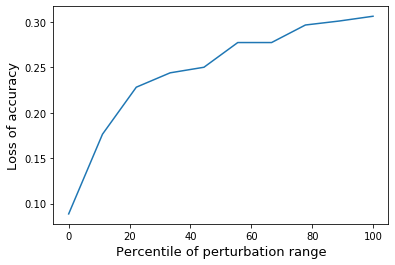

In [227]:
examine_local_fidelity(b_forest, b_X_test, b_y_test, count_per_step=10, framework='shap', epsilon=35)

[0.05333333333333323,
 0.14,
 0.22000000000000008,
 0.2599999999999999,
 0.2533333333333334,
 0.2666666666666667,
 0.2333333333333334,
 0.2866666666666666,
 0.29333333333333333,
 0.2666666666666666]

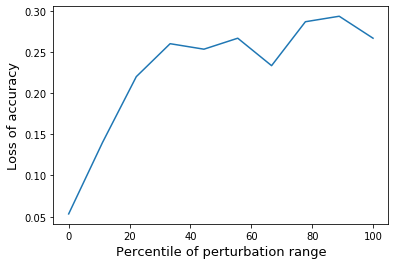

In [18]:
examine_local_fidelity(b_forest, b_X_test.iloc[:15], b_y_test[:15], framework='lime', count_per_step=10, epsilon=35)

# Lipschitz values

In [128]:
b_shap_l_vals = get_lipschitz(b_forest, b_X_test, b_y_test, epsilon=3, sample_num=30)

In [127]:
b_lime_l_vals = get_lipschitz(b_forest, b_X_test, b_y_test, epsilon=3, framework='lime', sample_num=30)

In [129]:
w_shap_l_vals = get_lipschitz(w_forest_model, w_X_test, w_y_test, epsilon=3, sample_num=30)
w_lime_l_vals = get_lipschitz(w_forest_model, w_X_test, w_y_test, epsilon=3, framework='lime', sample_num=30)

i_shap_l_vals = get_lipschitz(i_forest_model, i_X_test, i_y_test, epsilon=3, sample_num=30)
i_lime_l_vals = get_lipschitz(i_forest_model, i_X_test, i_y_test, epsilon=3, framework='lime', sample_num=30)

In [231]:
f_shap_l_vals = get_lipschitz(f_forest, f_X_test, f_y_test, epsilon=3, sample_num=30)
f_lime_l_vals = get_lipschitz(f_forest, f_X_test, f_y_test, epsilon=3, framework='lime', sample_num=30)

In [133]:
print(len(b_lime_l_vals))
print(len(b_shap_l_vals))

print(len(w_lime_l_vals))
print(len(w_shap_l_vals))

print(len(i_lime_l_vals))
print(len(i_shap_l_vals))



25
20
28
28
30
30


In [232]:
results_df = pd.DataFrame(columns=('Dataset', 'SHAP', 'LIME'))

b_df = pd.DataFrame(data={'SHAP': b_shap_l_vals[:20], 'LIME': b_lime_l_vals[:20]})
b_df['Dataset'] = 'Breast  cancer'

results_df = results_df.append(b_df, ignore_index=True)

i_df = pd.DataFrame(data={'SHAP': i_shap_l_vals[:20], 'LIME': i_lime_l_vals[:20]})
i_df['Dataset'] = 'Iris'

results_df = results_df.append(i_df, ignore_index=True)

w_df = pd.DataFrame(data={'SHAP': w_shap_l_vals[:20], 'LIME': w_lime_l_vals[:20]})
w_df['Dataset'] = 'Wine'

results_df = results_df.append(w_df, ignore_index=True)

f_df = pd.DataFrame(data={'SHAP': f_shap_l_vals[:20], 'LIME': f_lime_l_vals[:20]})
f_df['Dataset'] = 'FICO'

results_df = results_df.append(f_df, ignore_index=True)




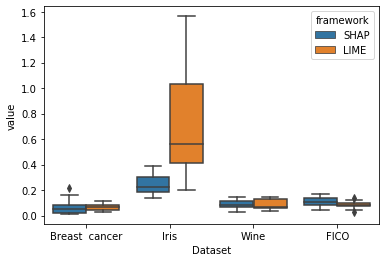

In [233]:
dd = pd.melt(results_df, id_vars=['Dataset'], value_vars=['SHAP','LIME'], var_name='framework')
sns.boxplot(x='Dataset', y='value', data=dd, hue='framework')

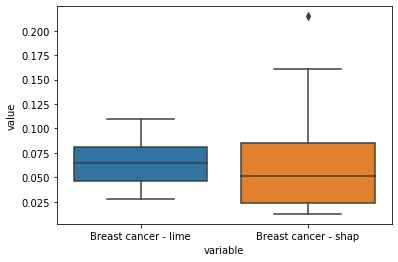

In [134]:
lip_df = pd.DataFrame({'Breast cancer - lime':b_lime_l_vals[:20], 'Breast cancer - shap':b_shap_l_vals[:20]})
sns.boxplot(x="variable", y="value", data=pd.melt(lip_df))

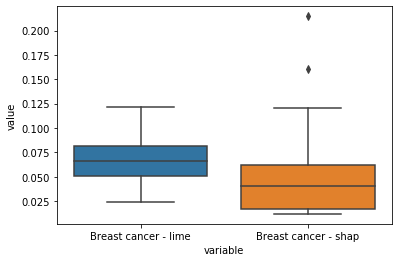

In [120]:
lip_df = pd.DataFrame({'Breast cancer - lime':b_lime_l_vals, 'Breast cancer - shap':b_shap_l_vals})
sns.boxplot(x="variable", y="value", data=pd.melt(lip_df))

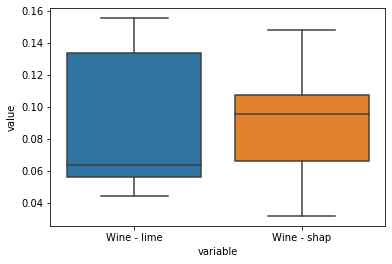

In [121]:

lip_df = pd.DataFrame({'Wine - lime':w_lime_l_vals, 'Wine - shap':w_shap_l_vals})
sns.boxplot(x="variable", y="value", data=pd.melt(lip_df))

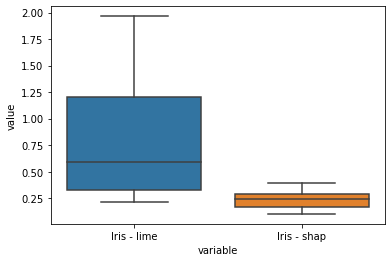

In [124]:
lip_df = pd.DataFrame({'Iris - lime':i__lime_l_vals, 'Iris - shap':i__shap_l_vals})
sns.boxplot(x="variable", y="value", data=pd.melt(lip_df))

In [63]:
f_shap_l = get_lipschitz(f_forest1, f_X_test1, f_y_test1, epsilon=3, sample_num=30)
f_lime_l = get_lipschitz(f_forest1, f_X_test1, f_y_test1, epsilon=3, sample_num=30, framework='lime')

w_shap_l = get_lipschitz(w_forest_model1, w_X_test1, w_y_test1, epsilon=3, sample_num=30)
w_lime_l = get_lipschitz(w_forest_model1, w_X_test1, w_y_test1, epsilon=3, sample_num=30, framework='lime')

b_shap_l = get_lipschitz(b_forest_model1, b_X_test1, b_y_test1, epsilon=3, sample_num=30)
b_lime_l = get_lipschitz(b_forest_model1, b_X_test1, b_y_test1, epsilon=3, sample_num=30, framework='lime')

i_shap_l = get_lipschitz(i_forest_model1, i_X_test1, i_y_test1, epsilon=3, sample_num=30)
i_lime_l = get_lipschitz(i_forest_model1, i_X_test1, i_y_test1, epsilon=3, sample_num=30, framework='lime')


In [65]:
results_df = pd.DataFrame(columns=('Dataset', 'SHAP', 'LIME'))

b_df = pd.DataFrame(data={'SHAP': b_shap_l[:20], 'LIME': b_lime_l[:20]})
b_df['Dataset'] = 'Breast  cancer'

results_df = results_df.append(b_df, ignore_index=True)

i_df = pd.DataFrame(data={'SHAP': i_shap_l[:20], 'LIME': i_lime_l[:20]})
i_df['Dataset'] = 'Iris'

results_df = results_df.append(i_df, ignore_index=True)

w_df = pd.DataFrame(data={'SHAP': w_shap_l[:20], 'LIME': w_lime_l[:20]})
w_df['Dataset'] = 'Wine'

results_df = results_df.append(w_df, ignore_index=True)

f_df = pd.DataFrame(data={'SHAP': f_shap_l[:20], 'LIME': f_lime_l[:20]})
f_df['Dataset'] = 'FICO'

results_df = results_df.append(f_df, ignore_index=True)





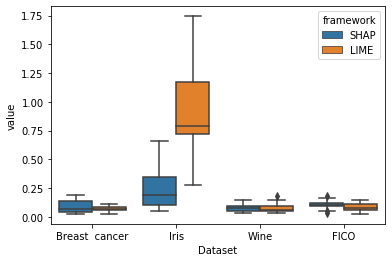

In [66]:
dd = pd.melt(results_df, id_vars=['Dataset'], value_vars=['SHAP','LIME'], var_name='framework')
sns.boxplot(x='Dataset', y='value', data=dd, hue='framework')

# Checking consistency

In [59]:
f_models = [f_forest1, f_forest2, f_forest3, f_forest4, f_forest5]
w_models = [w_forest_model1, w_forest_model2, w_forest_model3, w_forest_model4, w_forest_model5]
b_models = [b_forest_model1, b_forest_model2, b_forest_model3, b_forest_model4, b_forest_model5]
i_models = [i_forest_model1, i_forest_model2, i_forest_model3, i_forest_model4, i_forest_model5]


w_shap_c = check_consistency(w_models, w_X_test1, w_y_test1, epsilon=3, sample_num=30)
w_lime_c = check_consistency(w_models, w_X_test1, w_y_test1, epsilon=3, sample_num=30, framework='lime')


f_shap_c = check_consistency(f_models, f_X_test1, f_y_test1, epsilon=3, sample_num=30)
f_lime_c = check_consistency(f_models, f_X_test1, f_y_test1, epsilon=3, sample_num=30, framework='lime')

b_shap_c = check_consistency(b_models, b_X_test1, b_y_test1, epsilon=3, sample_num=30)
b_lime_c = check_consistency(b_models, b_X_test1, b_y_test1, epsilon=3, sample_num=30, framework='lime')

i_shap_c = check_consistency(i_models, i_X_test1, i_y_test1, epsilon=3, sample_num=30)
i_lime_c = check_consistency(i_models, i_X_test1, i_y_test1, epsilon=3, sample_num=30, framework='lime')


In [60]:
results_df = pd.DataFrame(columns=('Dataset', 'SHAP', 'LIME'))

b_df = pd.DataFrame(data={'SHAP': b_shap_c[:20], 'LIME': b_lime_c[:20]})
b_df['Dataset'] = 'Breast  cancer'

results_df = results_df.append(b_df, ignore_index=True)

i_df = pd.DataFrame(data={'SHAP': i_shap_c[:20], 'LIME': i_lime_c[:20]})
i_df['Dataset'] = 'Iris'

results_df = results_df.append(i_df, ignore_index=True)

w_df = pd.DataFrame(data={'SHAP': w_shap_c[:20], 'LIME': w_lime_c[:20]})
w_df['Dataset'] = 'Wine'

results_df = results_df.append(w_df, ignore_index=True)

f_df = pd.DataFrame(data={'SHAP': f_shap_c[:20], 'LIME': f_lime_c[:20]})
f_df['Dataset'] = 'FICO'

results_df = results_df.append(f_df, ignore_index=True)





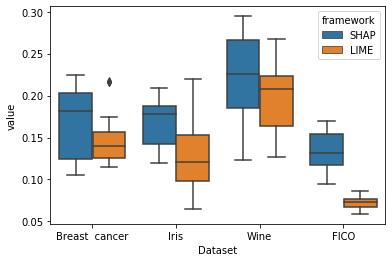

In [61]:
dd = pd.melt(results_df, id_vars=['Dataset'], value_vars=['SHAP','LIME'], var_name='framework')
sns.boxplot(x='Dataset', y='value', data=dd, hue='framework')

In [54]:
x = np.array([1.43,2.13,3.3])
type(x)
print(x)
if not isinstance(x, np.ndarray):
    x = np.array(x)
type(x)
print(x)

[1.43 2.13 3.3 ]
[1.43 2.13 3.3 ]
